<a href="https://www.kaggle.com/code/sjagkoo7/forecasting-mini-course-sales-s3e19?scriptVersionId=136877159" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import ydata_profiling

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/numba/core/decorators.py:262: NumbaDeprecationWarning: numba.generated_jit is deprecated. Please see the documentation at: https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-generated-jit for more information and advice on a suitable replacement.
  warnings.warn(msg, NumbaDeprecationWarning)
/opt/conda/lib/python3.10/site-packages/visions/backends/shared/nan_handling.py:51: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-o

/kaggle/input/playground-series-s3e19/sample_submission.csv
/kaggle/input/playground-series-s3e19/train.csv
/kaggle/input/playground-series-s3e19/test.csv


# Reading the Dataset

In [2]:
train=pd.read_csv('/kaggle/input/playground-series-s3e19/train.csv')
test=pd.read_csv('/kaggle/input/playground-series-s3e19/test.csv')
sample=pd.read_csv('/kaggle/input/playground-series-s3e19/sample_submission.csv')

In [3]:
train.head()

,id,date,country,store,product,num_sold
0,0,2017-01-01,Argentina,Kaggle Learn,Using LLMs to Improve Your Coding,63
1,1,2017-01-01,Argentina,Kaggle Learn,Using LLMs to Train More LLMs,66
2,2,2017-01-01,Argentina,Kaggle Learn,Using LLMs to Win Friends and Influence People,9
3,3,2017-01-01,Argentina,Kaggle Learn,Using LLMs to Win More Kaggle Competitions,59
4,4,2017-01-01,Argentina,Kaggle Learn,Using LLMs to Write Better,49


In [4]:
test.head()

,id,date,country,store,product
0,136950,2022-01-01,Argentina,Kaggle Learn,Using LLMs to Improve Your Coding
1,136951,2022-01-01,Argentina,Kaggle Learn,Using LLMs to Train More LLMs
2,136952,2022-01-01,Argentina,Kaggle Learn,Using LLMs to Win Friends and Influence People
3,136953,2022-01-01,Argentina,Kaggle Learn,Using LLMs to Win More Kaggle Competitions
4,136954,2022-01-01,Argentina,Kaggle Learn,Using LLMs to Write Better


In [5]:
sample.head()

,id,num_sold
0,136950,100
1,136951,100
2,136952,100
3,136953,100
4,136954,100


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136950 entries, 0 to 136949
Data columns (total 6 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   id        136950 non-null  int64 
 1   date      136950 non-null  object
 2   country   136950 non-null  object
 3   store     136950 non-null  object
 4   product   136950 non-null  object
 5   num_sold  136950 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 6.3+ MB


In [7]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27375 entries, 0 to 27374
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   id       27375 non-null  int64 
 1   date     27375 non-null  object
 2   country  27375 non-null  object
 3   store    27375 non-null  object
 4   product  27375 non-null  object
dtypes: int64(1), object(4)
memory usage: 1.0+ MB


In [8]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
id,136950.0,68474.500000,39534.204020,0.0,34237.25,68474.5,102711.75,136949.0
num_sold,136950.0,165.522636,183.691575,2.0,46.00,98.0,184.00,1380.0


In [9]:
#train.size
# len(train)
# len(train.columns)
# train.shape
train.columns.to_list()

['id', 'date', 'country', 'store', 'product', 'num_sold']

In [10]:
train.profile_report(title='Report',progress_bar=False)

In [11]:
#train.id.unique()
train.id.value_counts()

0         1
91295     1
91309     1
91308     1
91307     1
         ..
45644     1
45643     1
45642     1
45641     1
136949    1
Name: id, Length: 136950, dtype: int64

> id - is a just number and no signiface in dataset so better to remove in model building

# Pre - Processing

## Handling Null Values & Data Cleaning

In [12]:
#checking null values
train.isna().sum()

id          0
date        0
country     0
store       0
product     0
num_sold    0
dtype: int64

In [13]:
#checking null values
test.isna().sum()

id         0
date       0
country    0
store      0
product    0
dtype: int64

> no null values.

In [14]:
#checking duplicates
duplicate_rows_data=train[train.duplicated()]
duplicate_rows_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 0 entries
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        0 non-null      int64 
 1   date      0 non-null      object
 2   country   0 non-null      object
 3   store     0 non-null      object
 4   product   0 non-null      object
 5   num_sold  0 non-null      int64 
dtypes: int64(2), object(4)
memory usage: 0.0+ bytes


In [15]:
# if duplicate exist that can be dropped
train=train.drop_duplicates()
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 136950 entries, 0 to 136949
Data columns (total 6 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   id        136950 non-null  int64 
 1   date      136950 non-null  object
 2   country   136950 non-null  object
 3   store     136950 non-null  object
 4   product   136950 non-null  object
 5   num_sold  136950 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 7.3+ MB


In [16]:
#checking duplicates -- test data
duplicate_rows_data=test[test.duplicated()]
duplicate_rows_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 0 entries
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   id       0 non-null      int64 
 1   date     0 non-null      object
 2   country  0 non-null      object
 3   store    0 non-null      object
 4   product  0 non-null      object
dtypes: int64(1), object(4)
memory usage: 0.0+ bytes


In [17]:
# if duplicate exist that can be dropped
test=test.drop_duplicates()
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27375 entries, 0 to 27374
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   id       27375 non-null  int64 
 1   date     27375 non-null  object
 2   country  27375 non-null  object
 3   store    27375 non-null  object
 4   product  27375 non-null  object
dtypes: int64(1), object(4)
memory usage: 1.3+ MB


> no duplicates as well

In [18]:
train_df=train.copy()
test_df=test.copy()
id=test.id
id

0        136950
1        136951
2        136952
3        136953
4        136954
          ...  
27370    164320
27371    164321
27372    164322
27373    164323
27374    164324
Name: id, Length: 27375, dtype: int64

In [19]:
#Dropping the id feature
train_df=train_df.drop('id',axis=1)
test_df=test_df.drop('id',axis=1)

In [20]:
train_df.head()

,date,country,store,product,num_sold
0,2017-01-01,Argentina,Kaggle Learn,Using LLMs to Improve Your Coding,63
1,2017-01-01,Argentina,Kaggle Learn,Using LLMs to Train More LLMs,66
2,2017-01-01,Argentina,Kaggle Learn,Using LLMs to Win Friends and Influence People,9
3,2017-01-01,Argentina,Kaggle Learn,Using LLMs to Win More Kaggle Competitions,59
4,2017-01-01,Argentina,Kaggle Learn,Using LLMs to Write Better,49


In [21]:
test_df.head()

,date,country,store,product
0,2022-01-01,Argentina,Kaggle Learn,Using LLMs to Improve Your Coding
1,2022-01-01,Argentina,Kaggle Learn,Using LLMs to Train More LLMs
2,2022-01-01,Argentina,Kaggle Learn,Using LLMs to Win Friends and Influence People
3,2022-01-01,Argentina,Kaggle Learn,Using LLMs to Win More Kaggle Competitions
4,2022-01-01,Argentina,Kaggle Learn,Using LLMs to Write Better


In [22]:
train_df.date.dtype

dtype('O')

> date - datatype is object here means we have to change in pandas datetime

In [23]:
train_df.date=pd.to_datetime(train_df.date,format = '%Y-%m-%d')
test_df.date=pd.to_datetime(test_df.date,format = '%Y-%m-%d')

In [24]:
train_df.date.dtype

dtype('<M8[ns]')

In [25]:
train_df.head()

,date,country,store,product,num_sold
0,2017-01-01,Argentina,Kaggle Learn,Using LLMs to Improve Your Coding,63
1,2017-01-01,Argentina,Kaggle Learn,Using LLMs to Train More LLMs,66
2,2017-01-01,Argentina,Kaggle Learn,Using LLMs to Win Friends and Influence People,9
3,2017-01-01,Argentina,Kaggle Learn,Using LLMs to Win More Kaggle Competitions,59
4,2017-01-01,Argentina,Kaggle Learn,Using LLMs to Write Better,49


In [26]:
test_df.head()

,date,country,store,product
0,2022-01-01,Argentina,Kaggle Learn,Using LLMs to Improve Your Coding
1,2022-01-01,Argentina,Kaggle Learn,Using LLMs to Train More LLMs
2,2022-01-01,Argentina,Kaggle Learn,Using LLMs to Win Friends and Influence People
3,2022-01-01,Argentina,Kaggle Learn,Using LLMs to Win More Kaggle Competitions
4,2022-01-01,Argentina,Kaggle Learn,Using LLMs to Write Better


# Visualization

### Sales Trends of each respective Month of every Year

In [27]:
# number of product sold in each month of the each year
monthly_sales=train_df.resample('M',on='date').sum()['num_sold']
monthly_sales

/tmp/ipykernel_20/1565207656.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  monthly_sales=train_df.resample('M',on='date').sum()['num_sold']


date
2017-01-31    401396
2017-02-28    338179
2017-03-31    368364
2017-04-30    357268
2017-05-31    365720
2017-06-30    343909
2017-07-31    364172
2017-08-31    364188
2017-09-30    359522
2017-10-31    379251
2017-11-30    379724
2017-12-31    429520
2018-01-31    414040
2018-02-28    363348
2018-03-31    401631
2018-04-30    386685
2018-05-31    402382
2018-06-30    380247
2018-07-31    389474
2018-08-31    393673
2018-09-30    384665
2018-10-31    397466
2018-11-30    383739
2018-12-31    426613
2019-01-31    405765
2019-02-28    353480
2019-03-31    389053
2019-04-30    365779
2019-05-31    384008
2019-06-30    358033
2019-07-31    362450
2019-08-31    370925
2019-09-30    365085
2019-10-31    383017
2019-11-30    375945
2019-12-31    408632
2020-01-31    384006
2020-02-29    351459
2020-03-31    333898
2020-04-30    257850
2020-05-31    307616
2020-06-30    315985
2020-07-31    341271
2020-08-31    344388
2020-09-30    335531
2020-10-31    355954
2020-11-30    363151
2020-12-

Text(0, 0.5, 'Number of Prodcuts Sold')

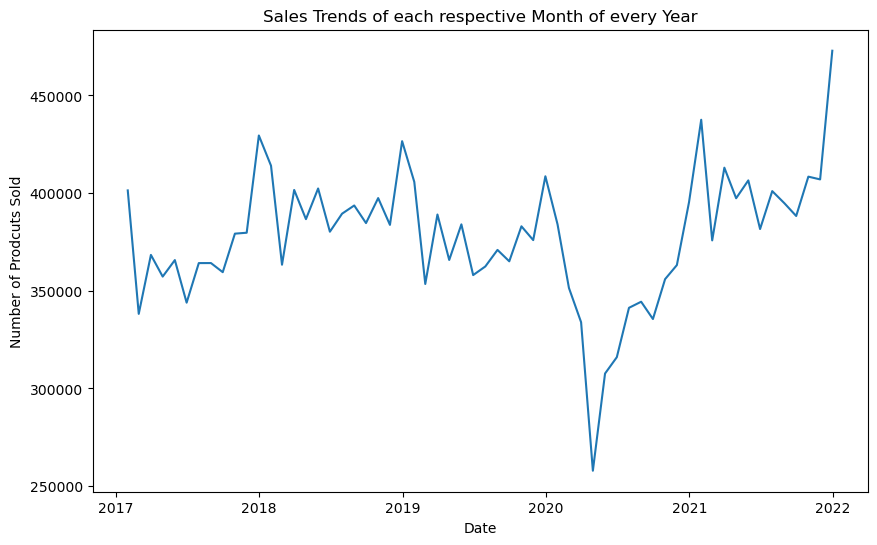

In [28]:
plt.figure(figsize=(10,6))
sns.lineplot(x=monthly_sales.index,y=monthly_sales.values)
plt.title('Sales Trends of each respective Month of every Year')
plt.xlabel('Date')
plt.ylabel('Number of Prodcuts Sold')

### Monthly sales for each Year

In [29]:
# number of product sold in each month of the each year
#resample - Convenience method for frequency conversion and resampling of time series. 
monthly_sales_year=train_df.resample('M',on='date')['num_sold'].sum().reset_index()
monthly_sales_year

,date,num_sold
0,2017-01-31,401396
1,2017-02-28,338179
2,2017-03-31,368364
3,2017-04-30,357268
4,2017-05-31,365720
5,2017-06-30,343909
6,2017-07-31,364172
7,2017-08-31,364188
8,2017-09-30,359522
9,2017-10-31,379251


In [30]:
#seperate year column from date
monthly_sales_year['year']=monthly_sales_year.date.dt.year
monthly_sales_year

,date,num_sold,year
0,2017-01-31,401396,2017
1,2017-02-28,338179,2017
2,2017-03-31,368364,2017
3,2017-04-30,357268,2017
4,2017-05-31,365720,2017
5,2017-06-30,343909,2017
6,2017-07-31,364172,2017
7,2017-08-31,364188,2017
8,2017-09-30,359522,2017
9,2017-10-31,379251,2017


In [31]:
for year in sorted(monthly_sales_year.year.unique()):
    year_data=monthly_sales_year[monthly_sales_year.year==year]
year_data

,date,num_sold,year
48,2021-01-31,437576,2021
49,2021-02-28,375801,2021
50,2021-03-31,413036,2021
51,2021-04-30,397381,2021
52,2021-05-31,406520,2021
53,2021-06-30,381613,2021
54,2021-07-31,401035,2021
55,2021-08-31,394822,2021
56,2021-09-30,388294,2021
57,2021-10-31,408445,2021


Text(0, 0.5, 'Number of Prodcuts Sold')

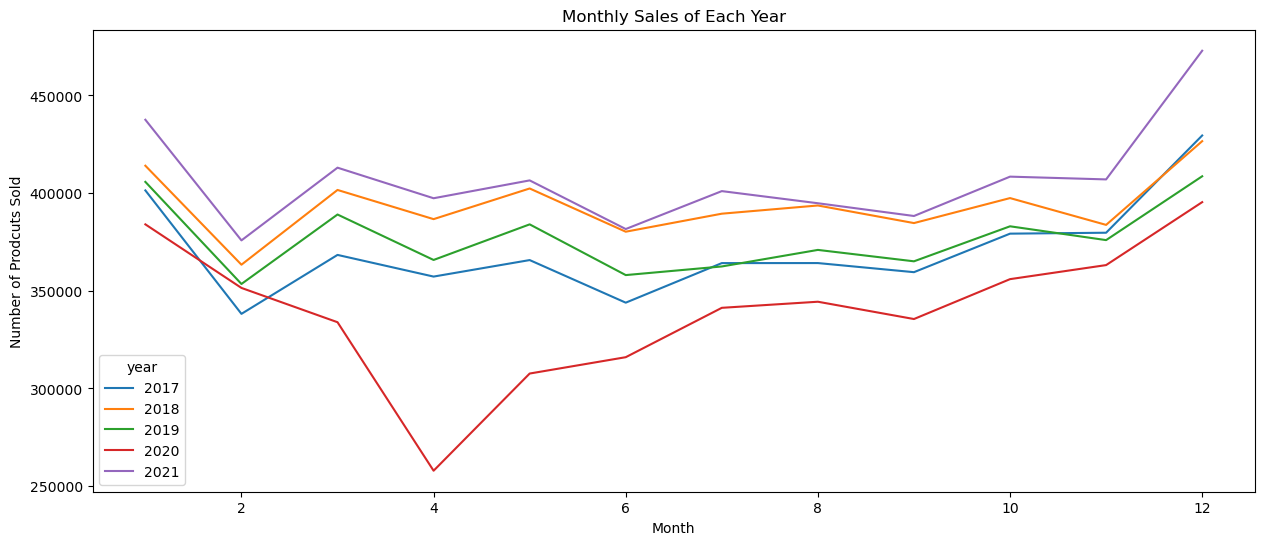

In [32]:
plt.figure(figsize=(15,6))
for year in sorted(monthly_sales_year.year.unique()):
    year_data=monthly_sales_year[monthly_sales_year.year==year]
    sns.lineplot(x=year_data.date.dt.month,y=year_data.num_sold,label=year)
plt.title('Monthly Sales of Each Year')
plt.legend(title='year')
plt.xlabel('Month')
plt.ylabel('Number of Prodcuts Sold')

### Monthwise sells trends on time in each country over the years

In [33]:
# to_period - Convert DataFrame from DatetimeIndex to PeriodIndex with desired frequency 
monthly_sales_country=train_df.groupby([train_df.date.dt.to_period('M'),'country'])['num_sold'].sum().reset_index()
monthly_sales_country

,date,country,num_sold
0,2017-01,Argentina,39222
1,2017-01,Canada,124270
2,2017-01,Estonia,54663
3,2017-01,Japan,106415
4,2017-01,Spain,76826
...,...,...,...
295,2021-12,Argentina,31780
296,2021-12,Canada,156256
297,2021-12,Estonia,84159
298,2021-12,Japan,109508


In [34]:
# to_timestamp - Cast to DatetimeIndex of timestamps, at beginning of period.
monthly_sales_country['date']=monthly_sales_country['date'].dt.to_timestamp()
monthly_sales_country

,date,country,num_sold
0,2017-01-01,Argentina,39222
1,2017-01-01,Canada,124270
2,2017-01-01,Estonia,54663
3,2017-01-01,Japan,106415
4,2017-01-01,Spain,76826
...,...,...,...
295,2021-12-01,Argentina,31780
296,2021-12-01,Canada,156256
297,2021-12-01,Estonia,84159
298,2021-12-01,Japan,109508


<Axes: xlabel='date', ylabel='num_sold'>

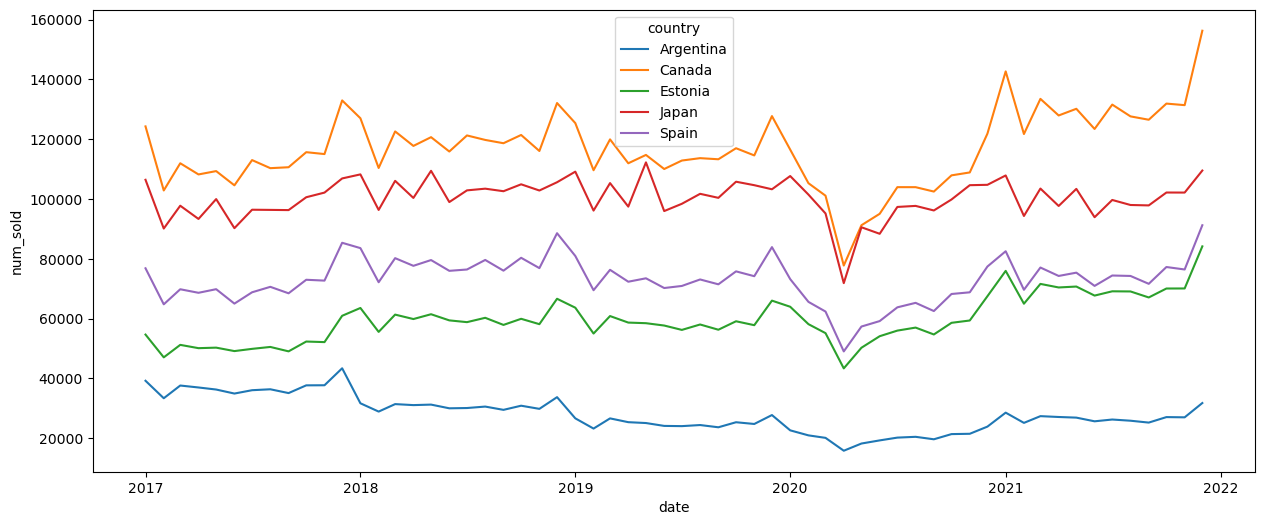

In [35]:
plt.figure(figsize=(15,6))
sns.lineplot(monthly_sales_country,x='date',y='num_sold',hue='country')